<a href="https://colab.research.google.com/github/Fahim136/Australian-Energy-Dataset-Analysis-Assignment/blob/main/Australian_Energy_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Configuring git***

In [ ]:
!apt-get install git -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git config --global user.name "Fahim Shariar"
!git config --global user.email "Shariarfahim356@gmail.com"

In [ ]:
!git clone https://github.com/Fahim136/Australian-Energy-Dataset-Analysis-Assignment.git

Cloning into 'Australian-Energy-Dataset-Analysis-Assignment'...


In [ ]:
%cd Australian-Energy-Dataset-Analysis-Assignment

/content/Australian-Energy-Dataset-Analysis-Assignment


deleted the main configuration part using remote url as it contained secret token and github raised a warning.

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


# ***Australian Energy Dataset Analysis***

In [30]:
# Import necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The sqlite3.Cursor class is an instance using which can invoke methods that execute SQLite statements, fetch data from the result sets of the queries.

In [31]:
# Connect to the SQLite database
conn = sqlite3.connect("/content/AUS_energy_sqlite3.db")

# Get cursor object to interact with the database
cur = conn.cursor()

In [32]:
# Get list of tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])

# For each table, get the schema
for table in tables:
    table_name = table[0]
    cur.execute(f"PRAGMA table_info({table_name});")
    schema = cur.fetchall()
    print(f"\nSchema for table '{table_name}':")
    for col in schema:
        print(col)

Tables in the database:
AUS_energy

Schema for table 'AUS_energy':
(0, 'Year', 'TEXT', 0, None, 0)
(1, 'State', 'TEXT', 0, None, 0)
(2, 'Coal (PJ)', 'REAL', 0, None, 0)
(3, 'Oil (PJ)', 'REAL', 0, None, 0)
(4, 'Gas (PJ)', 'REAL', 0, None, 0)
(5, 'Renewables (PJ)', 'REAL', 0, None, 0)
(6, 'Population', 'INTEGER', 0, None, 0)
(7, 'GSP ($ million)', 'INTEGER', 0, None, 0)


The above code connects to the SQLite database and after iterating over each table in the database, it retrieves a list of tables in the database using a SQL query on the sqlite_master table, which stores metadata about the database schema.

For each table, it retrieves the schema information using the "PRAGMA table_info() " function. This function returns one row for each column in the table, containing details such as column position on the table, column name, data type, default value and constraints.

## Example of grouping, filtering and most importantly cleaning a dataset for further analysis.

In [ ]:
# Writing SQL query to extract relevant information
query = """
SELECT *
FROM AUS_energy;
"""

# Load query results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Perform data manipulation tasks (filtering, grouping, aggregation)
# Example: filtering
# Convert the values in the 'Coal (PJ)' column to numeric type (float)
df['Oil (PJ)'] = pd.to_numeric(df['Oil (PJ)'], errors='coerce')  # Convert to float, errors='coerce' will convert non-numeric values to NaN

# Filter the DataFrame based on the condition
filtered_df = df[df['Oil (PJ)'] > 100]

# Example: grouping and aggregation
grouped_df = df.groupby('State').agg({'Oil (PJ)': 'sum'})

# Clean and pre-process the data
# Example: handling missing values
# Fill missing values in the 'Coal (PJ)' column with 0
df['Coal (PJ)'].fillna(0, inplace=True)
# Fill missing values in the 'Oil (PJ)' column with 0
df['Oil (PJ)'].fillna(0, inplace=True)
# Fill missing values in the 'Gas (PJ)' column with 0
df['Gas (PJ)'].fillna(0, inplace=True)
# Fill missing values in the 'Renewables (PJ)' column with 0
df['Renewables (PJ)'].fillna(0, inplace=True)

# Example: handling inconsistent values
df['State'] = df['State'].str.lower()

# Assign the cleaned DataFrame to cleaned_df
cleaned_df_old = df

# Replace blank values with 0 in the entire DataFrame
cleaned_df_old.replace('', 0, inplace=True)

# Display the modified DataFrame
print(cleaned_df_old)


       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    wa      132.9     294.3     474.7             15.6     2240250   
1   2008-09   nsw      800.9     587.5     131.6             54.7     7408540   
2   2008-09   vic      695.3     432.9     273.5             33.6     5371934   
3   2008-09   qld      629.2     469.5     187.9             77.4     4328771   
4   2008-09    sa       80.2     120.2     134.0             21.2     1608902   
..      ...   ...        ...       ...       ...              ...         ...   
93  2021-22   vic      410.7     410.0     237.5            105.2     6625964   
94  2021-22   qld      485.6     504.7     305.7            143.0     5320496   
95  2021-22    sa       25.9     141.6      80.2             48.3     1821200   
96  2021-22   tas        8.8      39.9       7.1             48.1      571013   
97  2021-22    nt        0.0      37.6     110.6              1.6      250219   

    GSP ($ million)  
0    

# ***Data Cleaning Step by Step***

## **step 1: connecting and loading the dataset**

In [33]:
# We have already connected the dataset using
# conn = sqlite3.connect("/content/AUS_energy_sqlite3.db")

# Writing SQL query to extract all the information from the dataset
query = """
SELECT *
FROM AUS_energy;
"""

# Load query results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

## **step 2: Understanding the Data**

In [34]:
print(df)

       Year State Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA     132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW     800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC     695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD     629.2     469.5     187.9             77.4     4328771   
4   2008-09    SA      80.2     120.2     134.0             21.2     1608902   
..      ...   ...       ...       ...       ...              ...         ...   
93  2021-22   VIC     410.7     410.0     237.5            105.2     6625964   
94  2021-22   QLD     485.6     504.7     305.7            143.0     5320496   
95  2021-22    SA      25.9     141.6      80.2             48.3     1821200   
96  2021-22   TAS       8.8      39.9       7.1             48.1      571013   
97  2021-22    NT                37.6     110.6              1.6      250219   

    GSP ($ million)  
0            2446

we can see that Coal (PJ) has a missing value on the 97th row, indicating there may be more null values throughout the dataframe.

In [38]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB
None
           Year State Coal (PJ)    Oil (PJ)    Gas (PJ)  Renewables (PJ)  \
count        98    98        98   98.000000   98.000000        98.000000   
unique       14     7        84         NaN         NaN              NaN   
top     2008-09    WA                   NaN         NaN              NaN   
freq          7    14        14         NaN         NaN            

we can see there's an anomaly in Coal (PJ) column which is showing missing value for top. Also this issue is the main reason for Coal (PJ) column having the data type of object, which should be  a numerical one.

also, there are "NaN" values on many columns because those columns contain numerical data, and those statistics are only applicable to categorical data.

## **step 3: Handle Missing Values**

### **Checking missing values**

In [39]:
# Convert empty strings in 'Coal (PJ)' to NaN
df['Coal (PJ)'] = df['Coal (PJ)'].replace('', np.nan)

# Check the number of missing values
print(df.isnull().sum())

# Fill missing values in 'Coal (PJ)' with the mean of the column
df['Coal (PJ)'] = df['Coal (PJ)'].astype('float64').fillna(df['Coal (PJ)'].astype('float64').mean())

# Verify that there are no more missing values
print(df.isnull().sum())

Year                0
State               0
Coal (PJ)          14
Oil (PJ)            0
Gas (PJ)            0
Renewables (PJ)     0
Population          0
GSP ($ million)     0
dtype: int64
Year               0
State              0
Coal (PJ)          0
Oil (PJ)           0
Gas (PJ)           0
Renewables (PJ)    0
Population         0
GSP ($ million)    0
dtype: int64


this clearly showed that the Coal (PJ) column had total of 14 missing/null values. after replacing them with the mean, it shows that there are no more existing null values.

## **step 4: ensuring correct data types**

In [40]:
# Convert 'Year' to a string (if needed for further processing)
df['Year'] = df['Year'].astype(str)

# Convert 'Coal (PJ)' to float
df['Coal (PJ)'] = df['Coal (PJ)'].astype(float)

# Ensure other energy columns are float
df['Oil (PJ)'] = df['Oil (PJ)'].astype(float)
df['Gas (PJ)'] = df['Gas (PJ)'].astype(float)
df['Renewables (PJ)'] = df['Renewables (PJ)'].astype(float)

# Ensure Population and GSP columns are integers
df['Population'] = df['Population'].astype(int)
df['GSP ($ million)'] = df['GSP ($ million)'].astype(int)

# Verify data types
print(df.dtypes)

Year                object
State               object
Coal (PJ)          float64
Oil (PJ)           float64
Gas (PJ)           float64
Renewables (PJ)    float64
Population           int64
GSP ($ million)      int64
dtype: object


non numerical data types are shown as object in pandas dataframe. other columns are showing appropriate values as float, int etc. like we tried to ensure.

## **step 5: handling outliers**

The process of identifying outliers was done using the IQR method, which works as follows:

Q1 (First Quartile): The value below which 25% of the data lies.
Q3 (Third Quartile): The value below which 75% of the data lies.
IQR (Interquartile Range): The difference between Q3 and Q1.
Lower Bound: Q1 - 1.5 * IQR. Values below this threshold are considered outliers.
Upper Bound: Q3 + 1.5 * IQR. Values above this threshold are considered outliers.

In [41]:
# List of numeric columns
numeric_columns = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)', 'Population', 'GSP ($ million)']

# Calculate IQR for all numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_condition = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers = df[numeric_columns][outlier_condition]

# Output the number of outliers and their indices
print("Number of outliers before imputation:", outliers.notnull().sum().sum())
print("Indices of outliers before imputation:", np.where(outlier_condition.any(axis=1))[0].tolist())

Number of outliers before imputation: 8
Indices of outliers before imputation: [42, 49, 56, 63, 70, 77, 84, 91]


These outputs mean there are 8 data points in your dataset that are considered outliers according to the Interquartile Range (IQR) method applied to all numeric columns. These outliers are data points that lie significantly outside the range of the majority of the data.

The indices [42, 49, 56, 63, 70, 77, 84, 91] refer to the rows in the DataFrame where these outliers are located. This means that the rows at these positions contain values that are considered outliers in at least one of the numeric columns.

### **Boxplotting the dataframe to see the outliers shown above**

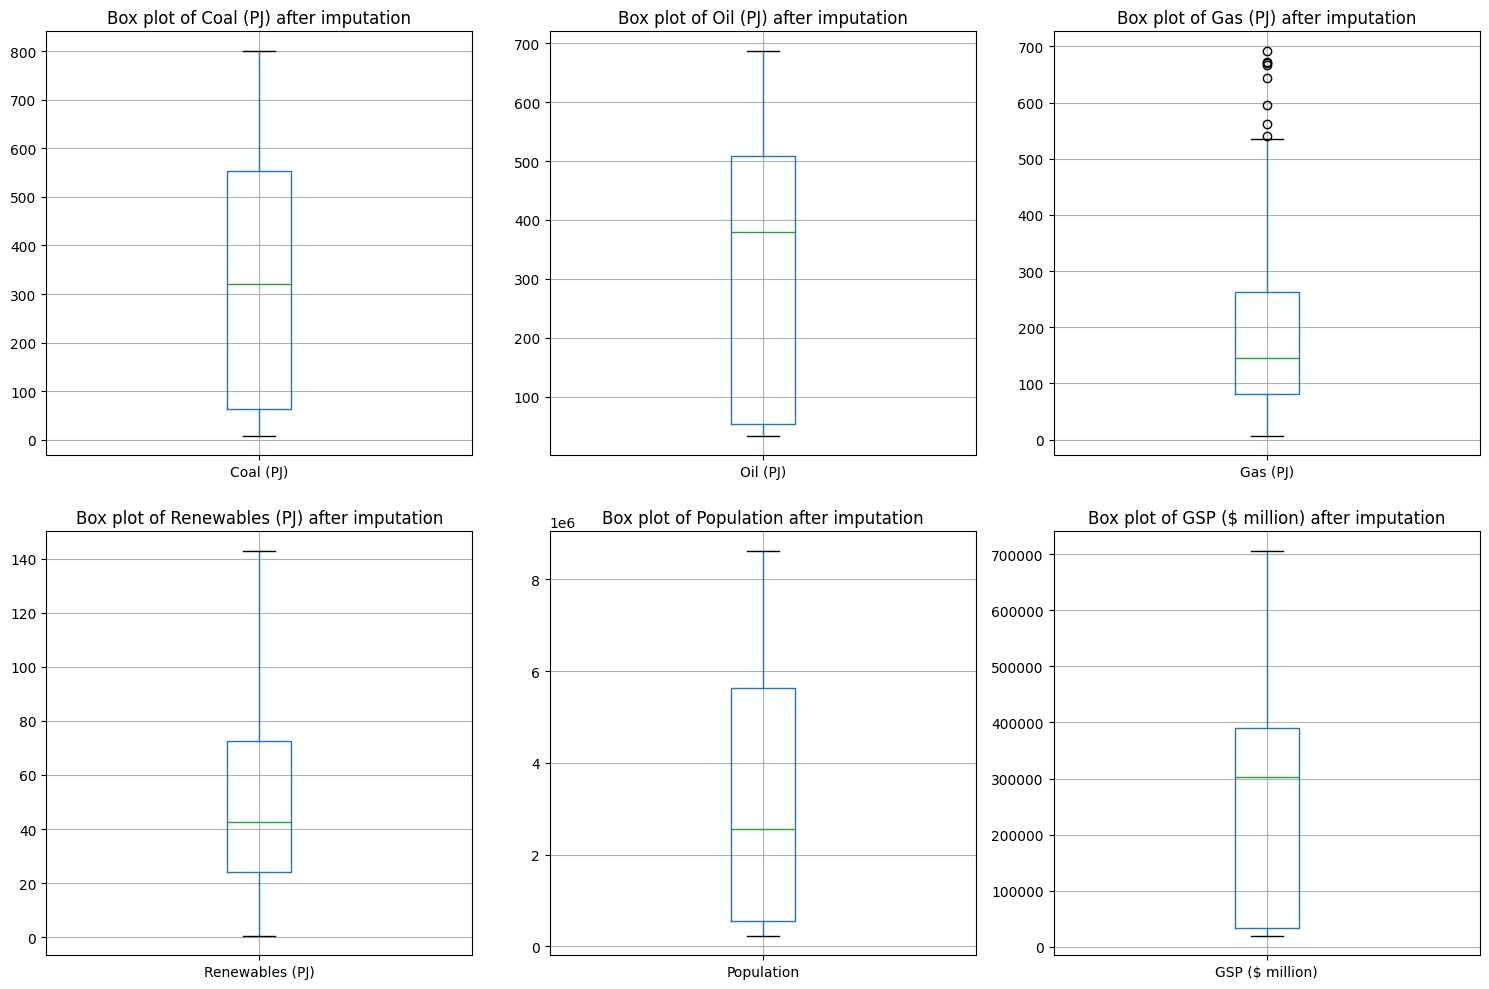

In [42]:
#Boxplot for better understanding of the outliers position
plt.figure(figsize=(15, 10))

# Generate box plots for each numeric column to visualize the distribution after imputation
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=col)
    plt.title(f'Box plot of {col} after imputation')

plt.tight_layout()
plt.show()

In [43]:
# Impute outliers with the median of the respective columns
for col in numeric_columns:
    median = df[col].median()
    df.loc[outlier_condition[col], col] = median

# Verify if the imputation is done
print("Sum of null values in the dataframe after imputation:")
print(df.isnull().sum())


Sum of null values in the dataframe after imputation:
Year               0
State              0
Coal (PJ)          0
Oil (PJ)           0
Gas (PJ)           0
Renewables (PJ)    0
Population         0
GSP ($ million)    0
dtype: int64


We could use multiple methods for handling outliers. But we chose imputing the outliers as there are few rows and columns in the given dataset. Removing multiple rows may effect the efficiency of the analysis.

We also checked if there are null values in the dataframe after imputation as faulty imputation method may result in creating garbage null values in the dataframe.

In [45]:
# Recalculate IQR and thresholds after imputation
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers again after imputation
outlier_condition = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers = df[numeric_columns][outlier_condition].dropna(how='all')

# Output the number of outliers and their indices
print("Number of outliers after imputation:", outliers.notnull().sum().sum())
print("Indices of outliers after imputation:", outliers.index.tolist())


Number of outliers after imputation: 1
Indices of outliers after imputation: [35]


After imputation we can see that we have solved most of the outliers problems. But there are still one outlier remaining even after imputing them with the median. As this outlier row still parsisted, we will just remove this row as removing just one row won't effect the precision of our analysis.

In [47]:
# Display the data of outlier
outlier_data = df.loc[outliers.index.tolist()]
print("Data of the outlier:")
print(outlier_data)

Data of the outlier:
       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
35  2013-14    WA      136.1     373.5     536.1             20.9     2517608   

    GSP ($ million)  
35           329469  


We can clearly see the row of the one remaining outlier. The value in Gas (PJ) is the reason behind this data anomaly.

### **Observing the outlier row to get some insight on the dataframe, after removing most of the outliers; and to get a clear look at what we are removing**

In [72]:
# Remove outlier
cleaned_df = df.drop(index=outliers.index.tolist())

# Verify that the row has been removed
print("Shape of DataFrame before removing outlier row:", df.shape)
print("Shape of DataFrame after removing outlier row:", cleaned_df.shape)

Shape of DataFrame before removing outlier row: (98, 8)
Shape of DataFrame after removing outlier row: (97, 8)


We removed the outlier from the dataframe, as it seen in the shape, there is one less row after removing it.

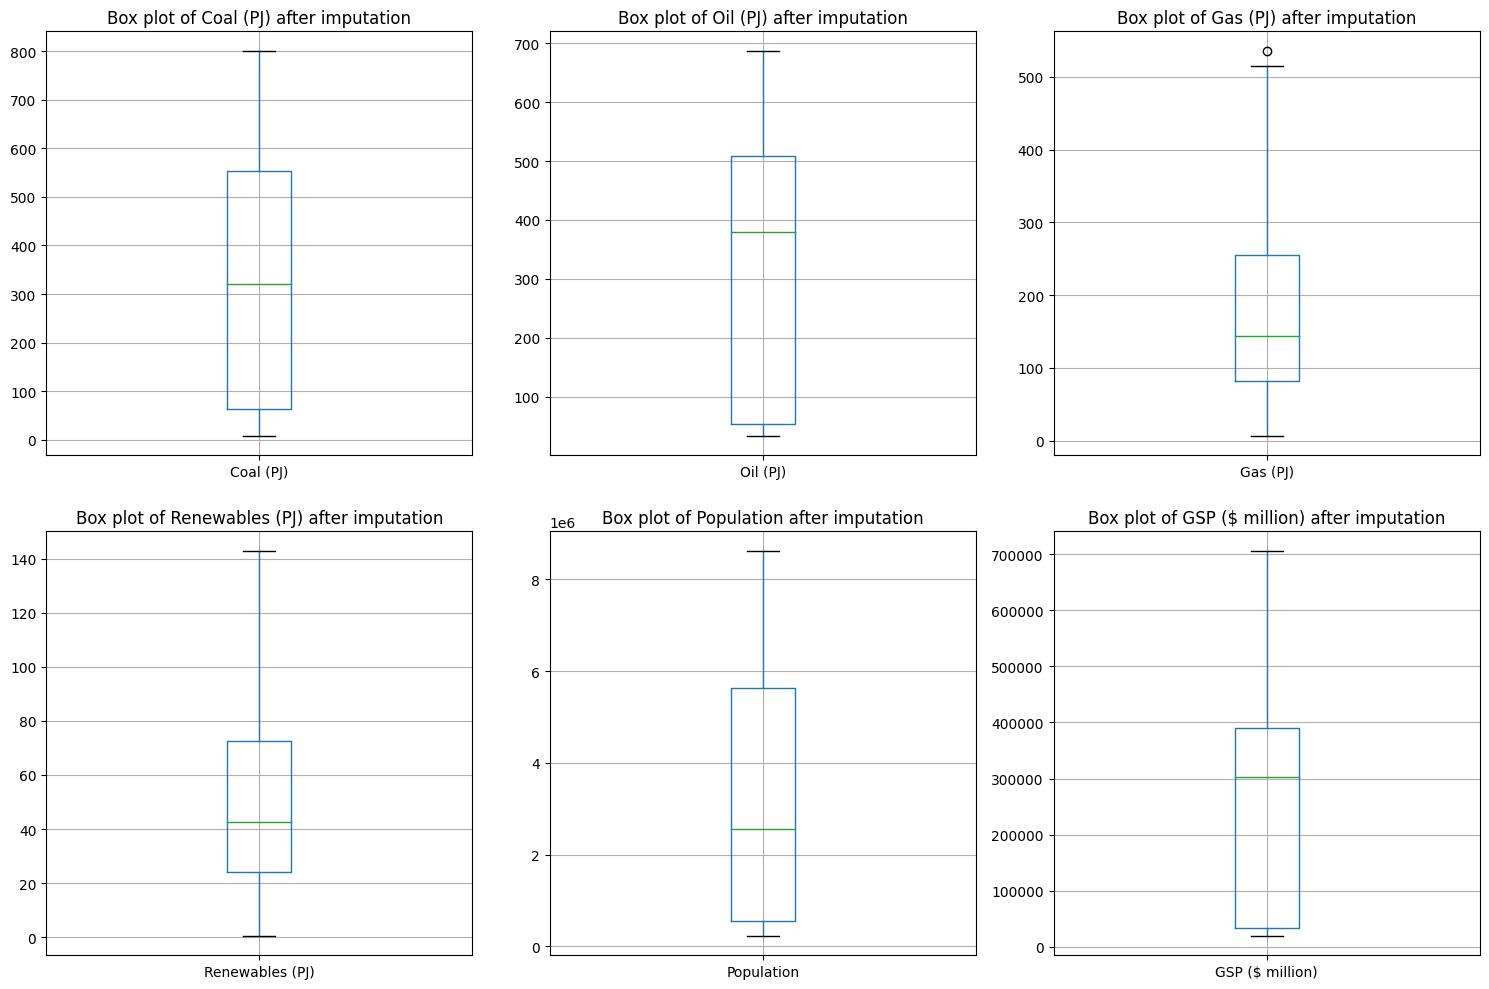

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Generate box plots for each numeric column to visualize the distribution after imputation
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=col)
    plt.title(f'Box plot of {col} after imputation')

plt.tight_layout()
plt.show()

The boxplot of the columns after removing all the outliers from each and every column. The plot is clean and as we can see there are no more outliers present in our dataframe.

## ***Main Insights:***

**Trends Over Time:**
We can observe trends in energy consumption across different states over the years from 2008-09 to 2021-22.

**Regional Variances:**
There are significant differences in energy consumption between states, with some states consistently consuming more energy than others.

**Energy Source Breakdown:**
The data includes energy consumption from various sources such as coal, oil, gas, renewables, etc., providing insights into the energy mix of each state.

**Population and Economic Factors:**
The dataset also includes population and Gross State Product (GSP), which can be used to analyze the relationship between energy consumption and population/economic growth.

## ***Limitations***
**Data Granularity:**
The dataset provides annual aggregates, but finer granularity (e.g., monthly or quarterly data) could provide more insights into seasonal variations or short-term trends.

**Missing Context**:
Without additional context or external factors (e.g., climate, industrial activities, policy changes), it's challenging to fully interpret the observed trends in energy consumption.

**Outliers**:

The dataset contains outliers, which can skew statistical analyses and affect the accuracy of insights derived from the data. Proper handling and imputation of these outliers are necessary to ensure the robustness of any conclusions drawn from this dataset.

## ***Usability and Effectiveness of Python Notebooks:***
**Interactive Analysis:**
Python notebooks allow for interactive data analysis, enabling users to explore data, run code, and visualize results in a single document.

**Reproducibility:**
Notebooks provide a transparent and reproducible workflow, making it easy to share analyses with others and replicate findings.

**Documentation and Communication:**
Notebooks serve as effective documentation tools, allowing users to combine code, analysis, and visualizations with explanatory text to communicate findings.

**Integration with Libraries and Tools:**
Python's rich ecosystem of libraries (e.g., Pandas, Matplotlib) enables seamless data manipulation, analysis, and visualization within notebooks.

## ***Role of Gen AI***

Gen AI plays a pivotal role in augmenting human intelligence, accelerating problem-solving, and enabling data-driven decision-making across various domains. However, it's crucial to approach its use with careful consideration of ethical implications and ensure collaboration between AI systems and human experts for optimal outcomes.

# **Group A**

## **Task 1: Compute and visualize the total energy consumption for each state.**

### **Further data cleaning before the task**

In [74]:
# Identify non-numeric values in the energy columns only
non_numeric_values = cleaned_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()

# Drop rows containing non-numeric values for those columns
cleaned_df = cleaned_df.dropna(subset=['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)'])

In [75]:
# Convert the columns to numeric type
cleaned_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']] = cleaned_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].apply(pd.to_numeric)

In [76]:
# Exclude the 'Year' column from the imputation
columns_to_impute = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']
cleaned_df[columns_to_impute] = cleaned_df[columns_to_impute].fillna(cleaned_df[columns_to_impute].mean())

In [78]:
# Check unique values in each column to identify unexpected values
unique_values = cleaned_df.apply(lambda x: x.unique())

# Print unique values for each column
print("Unique values in each column:\n", unique_values)

Unique values in each column:
 Year               [2008-09, 2009-10, 2010-11, 2011-12, 2012-13, ...
State                               [WA, NSW, VIC, QLD, SA, TAS, NT]
Coal (PJ)          [132.9, 800.9, 695.3, 629.2, 80.2, 12.4, 320.7...
Oil (PJ)           [294.3, 587.5, 432.9, 469.5, 120.2, 41.6, 54.8...
Gas (PJ)           [474.7, 131.6, 273.5, 187.9, 134.0, 11.2, 39.9...
Renewables (PJ)    [15.6, 54.7, 33.6, 77.4, 21.2, 37.1, 0.4, 14.6...
Population         [2240250, 7408540, 5371934, 4328771, 1608902, ...
GSP ($ million)    [244695, 530532, 368579, 284526, 100174, 28165...
dtype: object


In [79]:
# Check for missing values after imputation
missing_values_after_imputation = cleaned_df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values after imputation:
 Year               0
State              0
Coal (PJ)          0
Oil (PJ)           0
Gas (PJ)           0
Renewables (PJ)    0
Population         0
GSP ($ million)    0
dtype: int64


As we can see, the columns we have to aggregate contains no garbage value or null or whitespaces. So we can start analysing the data for those columns.

  State  total_energy_consumption
0   NSW                  21199.00
1    NT                   5993.45
2   QLD                  19979.20
3    SA                   4507.40
4   TAS                   1475.00
5   VIC                  19061.50
6    WA                  10504.30


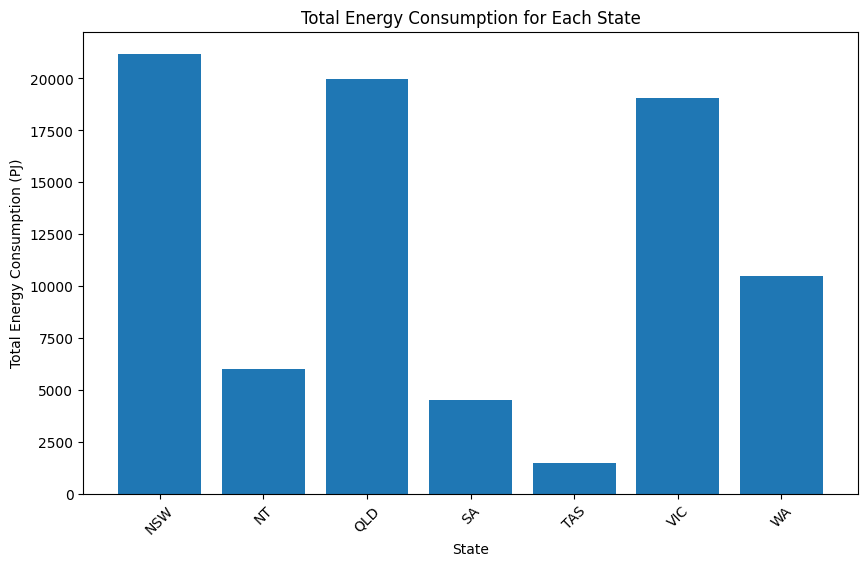

In [80]:

# Compute total energy consumption for each state using the cleaned_df dataframe
cleaned_df.loc[:, 'total_energy_consumption'] = (
    cleaned_df.loc[:, 'Coal (PJ)'] +
    cleaned_df.loc[:, 'Oil (PJ)'] +
    cleaned_df.loc[:, 'Gas (PJ)'] +
    cleaned_df.loc[:, 'Renewables (PJ)']
)

# Group by state and sum the total energy consumption
state_energy_df = cleaned_df.groupby('State', as_index=False)['total_energy_consumption'].sum()

# Check if any states are missing after grouping
print(state_energy_df)

# Visualize the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
plt.bar(state_energy_df['State'], state_energy_df['total_energy_consumption'])
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption for Each State')
plt.xticks(rotation=45)
plt.show()

Grouping: We grouped the data by state. The groupby() function was used for grouping.

Aggregation: We summed up the energy consumption values across different energy sources ('Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)') for each row in the Cleaned DataFrame. This was done using the loc accessor to select the relevant columns and perform element-wise addition.

The parameter as_index=False is used to ensure that the grouped column ('State') is not set as the index of the resulting DataFrame.

Then we visualized the total energy consumption for each state using a bar plot. The 'State' column is used as the x-axis, and the 'total_energy_consumption' column was used as the y-axis. Labels and titles were added to the plot for clarity, and plt.xticks(rotation=45) was used to rotate the x-axis labels for better readability.

## **Task 2: Compute and visualize the total energy consumption by fuel type.**

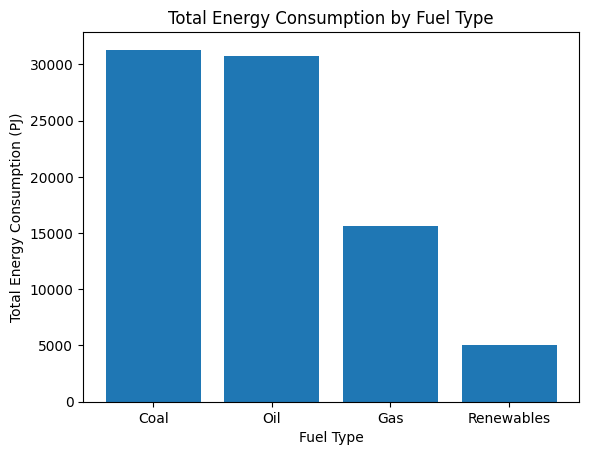

In [54]:
# Compute total energy consumption by fuel type using the cleaned DataFrame
total_energy_consumption = cleaned_df[["Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)"]].sum()

# Create a new DataFrame to hold the results
fuel_energy_df = pd.DataFrame({
    "fuel_type": ["Coal", "Oil", "Gas", "Renewables"],
    "total_energy_consumption": total_energy_consumption.values
})

# Visualize the data
plt.bar(fuel_energy_df['fuel_type'], fuel_energy_df['total_energy_consumption'])
plt.xlabel('Fuel Type')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type')
plt.show()

Grouping: We selected the columns representing different energy sources ("Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)") from the cleaned DataFrame (cleaned_df).

Aggregation: We then used the sum() function to calculate the total energy consumption across all rows for each energy source. The result was stored in a Series called total_energy_consumption.

Then we created a new DataFrame (fuel_energy_df) to hold the results of the total energy consumption by fuel type. We constructed this DataFrame using a dictionary where the keys are the column names ("fuel_type", "total_energy_consumption") and the values were lists containing the fuel types and their respective total energy consumption values.

Finally, we visualized the total energy consumption by fuel type using a bar plot. The 'fuel_type' column was used as the x-axis, and the 'total_energy_consumption' column was used as the y-axis. Labels and titles were added to the plot for clarity, and plt.show() displays the plot.

## **Task 3: Analyze and plot the total energy consumption fuel types for each year.**

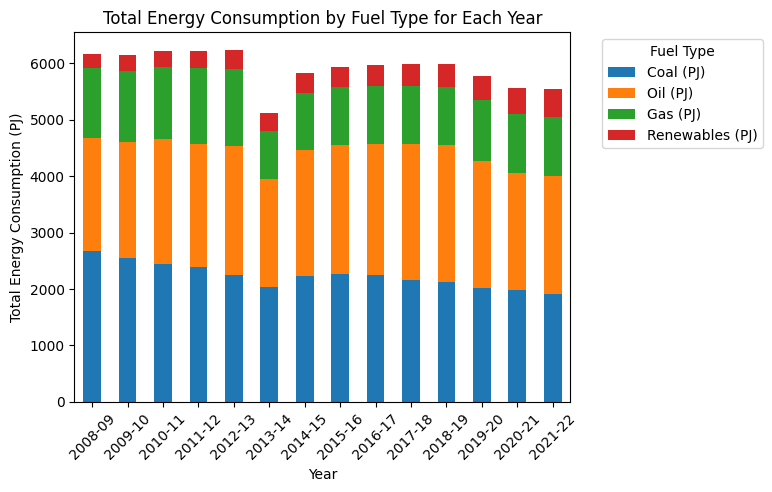

In [55]:
# Group the cleaned DataFrame by Year and sum the energy consumption for each fuel type
yearly_energy_df = cleaned_df.groupby('Year').agg({
    "Coal (PJ)": "sum",
    "Oil (PJ)": "sum",
    "Gas (PJ)": "sum",
    "Renewables (PJ)": "sum"
}).reset_index()

# Plot the data
yearly_energy_df.plot(x='Year', kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type for Each Year')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Grouping: We used the groupby function to group the cleaned_df DataFrame by the 'Year' column.

Aggregation: We used the agg function to aggregate the grouped data. For each group (i.e., each year), we calculate the sum of energy consumption for each fuel type specified in the dictionary passed to agg.

The result was stored in a new DataFrame called yearly_energy_df. The reset_index() function was used to reset the index of the DataFrame to make 'Year' a regular column instead of an index.

Finally we plotted the total energy consumption by fuel type for each year using a stacked bar plot. The 'Year' column was used as the x-axis, and each fuel type's total energy consumption was represented as a stacked bar. Labels and titles were added to the plot for clarity, and a legend was included to identify the different fuel types. plt.show() displays the plot.

## **Task 4: Analyze and visualize the total energy consumption for each state for each year.**

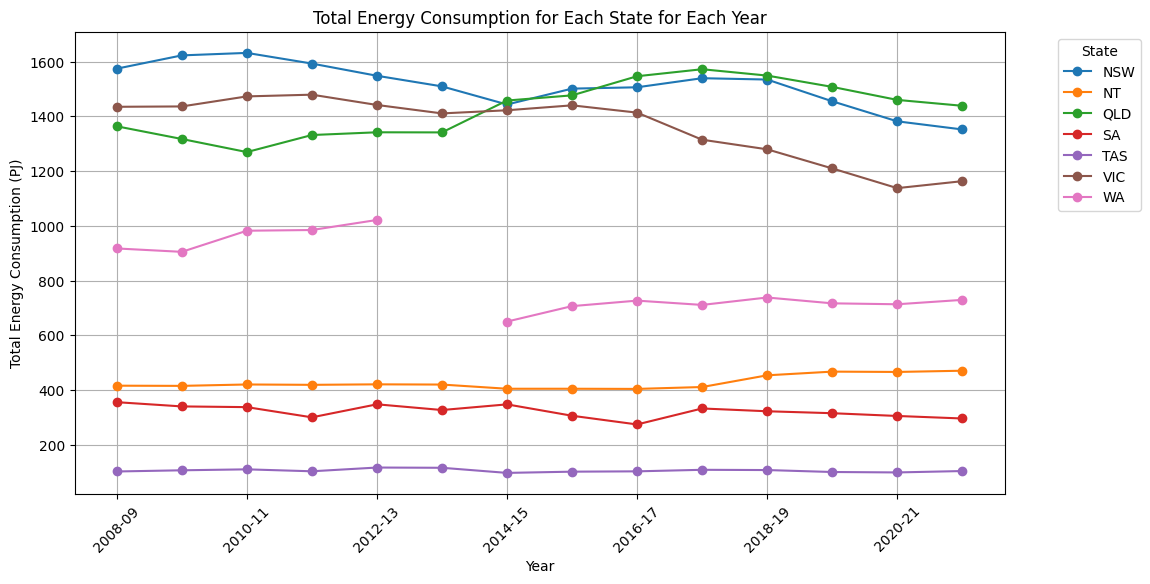

In [56]:
# Group the cleaned DataFrame by Year and State and sum the energy consumption
state_year_energy_df = cleaned_df.groupby(['Year', 'State']).agg({
    "Coal (PJ)": "sum",
    "Oil (PJ)": "sum",
    "Gas (PJ)": "sum",
    "Renewables (PJ)": "sum"
}).reset_index()

# Calculate the total energy consumption by summing all fuel types
state_year_energy_df['total_energy_consumption'] = state_year_energy_df.iloc[:, 2:].sum(axis=1)

# Pivot the DataFrame for better visualization
state_year_pivot = state_year_energy_df.pivot(index='Year', columns='State', values='total_energy_consumption')

# Plot the data
state_year_pivot.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption for Each State for Each Year')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Grouping: We used the groupby function to group the cleaned_df DataFrame by both the 'Year' and 'State' columns.

Aggregation: We used the agg function to aggregate the grouped data. For each group (i.e., each combination of year and state), we calculated the sum of energy consumption across all fuel types (columns 2 onward) for each row. This total was added as a new column named 'total_energy_consumption' in the state_year_energy_df DataFrame.

Then the result was stored in a new DataFrame called state_year_energy_df. The reset_index() function was used to reset the index of the DataFrame to make 'Year' and 'State' regular columns instead of being part of the index.

The pivot function was used to reshape the DataFrame such that each state became a separate column, and the index became the 'Year'. This reshaping facilitated visualization and analysis.

Finally, this block of code plotted the total energy consumption for each state for each year using a line plot. Each state was represented by a separate line, and each data point represented the total energy consumption for that state in a particular year. Labels and titles were added to the plot for clarity, and a legend was included to identify the different states. In the end, plt.show() displayed the plot.

# **Group B**

## **Task 5: Analyze and visualize the total energy consumption for each state, broken down by fuel type.**

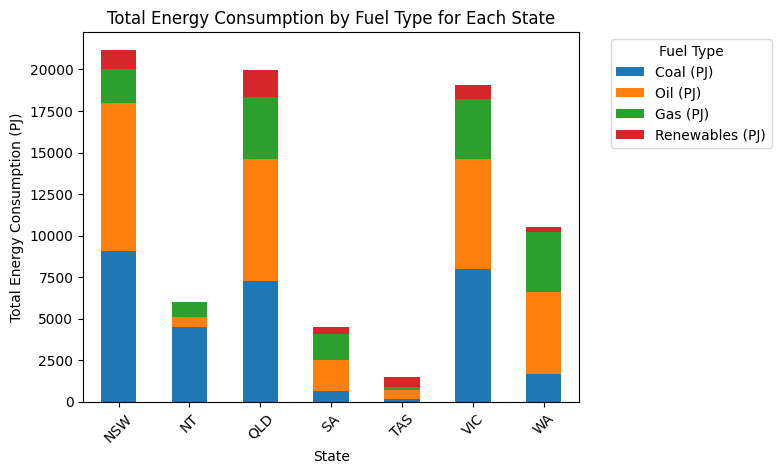

In [57]:
# Compute total energy consumption for each state and fuel type using the cleaned_df DataFrame
state_fuel_energy_df = cleaned_df.groupby('State').agg({
    "Coal (PJ)": "sum",
    "Oil (PJ)": "sum",
    "Gas (PJ)": "sum",
    "Renewables (PJ)": "sum"
}).reset_index()

# Plot the data
state_fuel_energy_df.plot(x='State', kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type for Each State')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


Grouping: We used the groupby function to group the cleaned_df DataFrame by the 'State' column.

Aggregation: The agg function was used to aggregate the grouped data. For each state, we calculated the sum of energy consumption for each fuel type specified in the dictionary passed to agg.

The reset_index() function was used to reset the index of the DataFrame to make 'State' a regular column instead of being part of the index.

Finally we plotted the total energy consumption for each state broken down by fuel type using a stacked bar plot. Labels, titles, and legends were added for clarity.

# **Group C**

## **Task 9: Analyse and compare the growth rate of the GSP and the consumption of renewable energy for each state.**

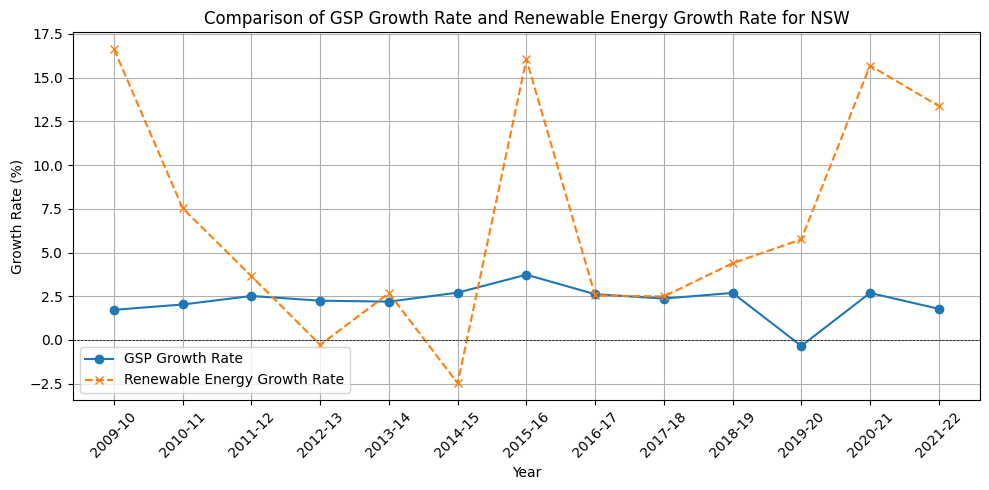

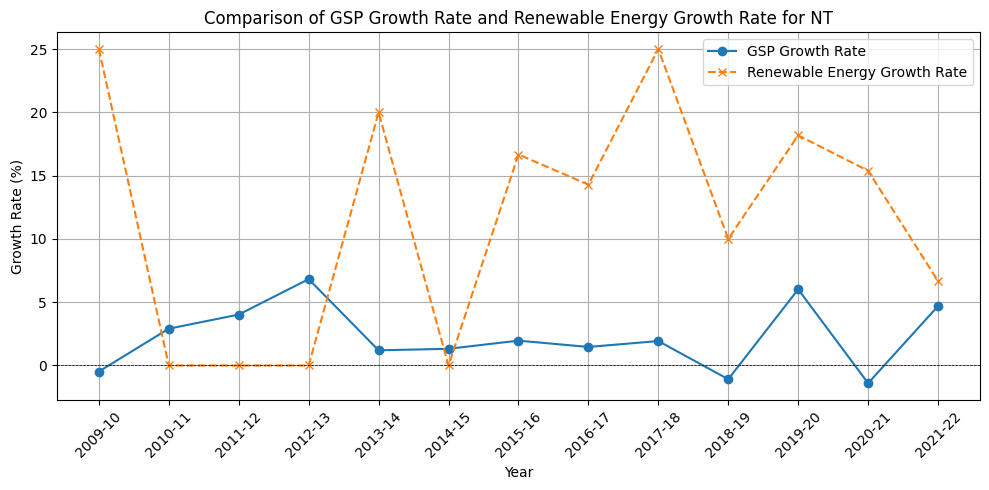

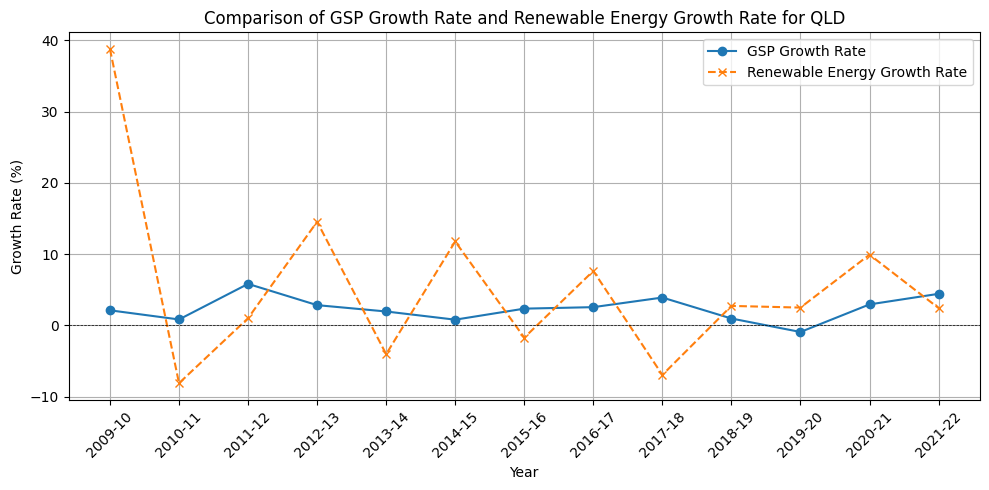

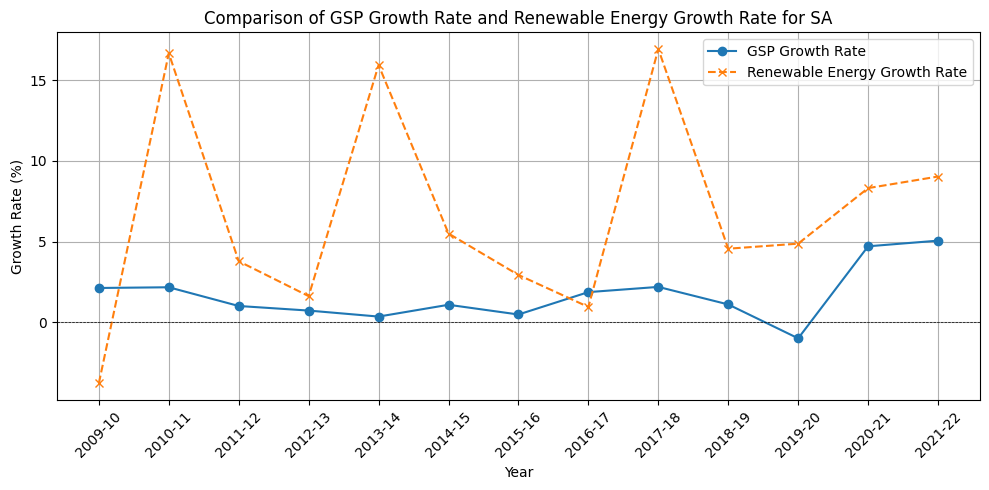

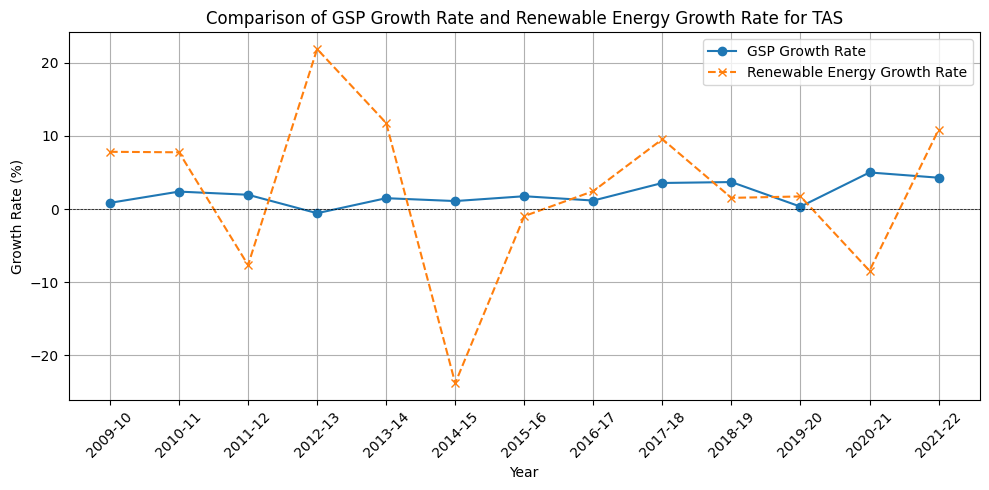

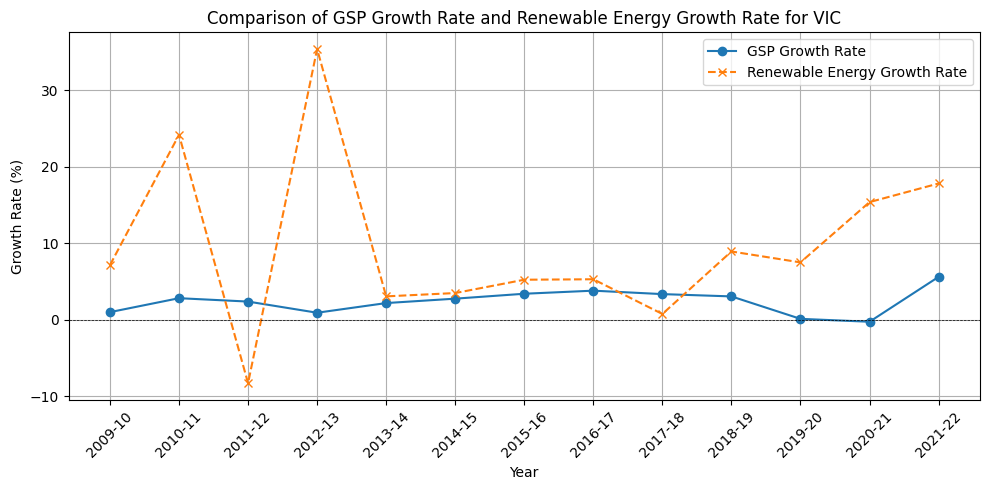

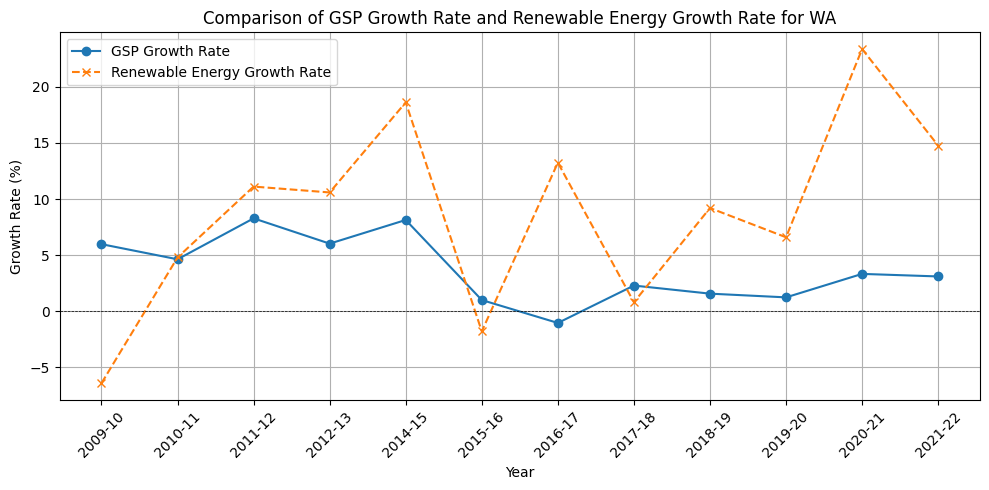

In [58]:
# Step 1: Calculate growth rates using the cleaned_df DataFrame
cleaned_df['gsp_growth_rate'] = cleaned_df.groupby('State')["GSP ($ million)"].pct_change() * 100
cleaned_df['renewables_growth_rate'] = cleaned_df.groupby('State')["Renewables (PJ)"].pct_change() * 100

# Drop the first row of each state group which will have NaN values for growth rates
growth_rate_df = cleaned_df.dropna(subset=['gsp_growth_rate', 'renewables_growth_rate'])

# Step 2: Plot the data for each state
for state, state_data in growth_rate_df.groupby('State'):
    plt.figure(figsize=(10, 5))

    # Plot GSP Growth Rate
    plt.plot(state_data['Year'], state_data['gsp_growth_rate'], marker='o', label='GSP Growth Rate')

    # Plot Renewable Energy Growth Rate
    plt.plot(state_data['Year'], state_data['renewables_growth_rate'], marker='x', linestyle='--', label='Renewable Energy Growth Rate')

    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.title(f'Comparison of GSP Growth Rate and Renewable Energy Growth Rate for {state}')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Grouping: We grouped the DataFrame by the 'State' column and selected the 'Renewables (PJ)' column. It created groups of data for each unique state.

Aggregation: We used pct_change() function to calculate the percentage change between each element and the previous element in the group. It computed the growth rate of renewable energy consumption over time for each state.

We also multiplied the percentage change values by 100 to convert them into percentage format.

[The calculation of percentage change (pct_change()) inherently introduces NaN values for the first row of each group. This is because there is no previous value to compare with for the first row in each group. So we dropped those irrelevant NaN values.]

Finally we iterated over each state group in the growth_rate_df DataFrame, in order to combine these grouping and aggregation and plotted the GSP growth rate and renewable energy growth rate over the years for each state for better individual visualization as well as analysis of the data.

